In [1]:
import pickle
import sys
sys.path.append('../../../pyrfold')


In [2]:
import pyrfold

In [3]:
with open('exampledata/example_timecourse.p') as tounpick:
    dictionary = pickle.load(tounpick)

In [4]:
dictionary[1]['time']

[0.0,
 0.02,
 33.8,
 67.5,
 100.2,
 134.0,
 166.7,
 200.5,
 234.2,
 266.9,
 300.7,
 333.4,
 367.1,
 400.9,
 400.9,
 435.5,
 436.6,
 467.0,
 467.0,
 500.4,
 504.1,
 533.7,
 570.0,
 570.0,
 603.6,
 635.3,
 670.7,
 700.3,
 701.0,
 766.5,
 767.0,
 811.2,
 843.4,
 870.9,
 902.1,
 934.3,
 968.3,
 1007.5,
 1033.5,
 1072.5,
 1100.1,
 1140.5,
 1143.8,
 1181.6,
 1215.3,
 1249.7,
 1284.1,
 1324.1,
 1360.7,
 1360.7,
 1395.1,
 1400.2,
 1401.0,
 1436.5,
 1468.8,
 1472.6,
 1506.4,
 1538.3,
 1589.4,
 1615.6,
 1633.7,
 1633.7,
 1633.9,
 1633.9,
 1634.9,
 1635.8,
 1678.1,
 1701.8,
 1759.2,
 1770.5,
 1827.9,
 1839.2,
 1867.9,
 1903.7,
 1936.5,
 1997.5,
 2015.2,
 2035.3,
 2090.0,
 2090.0,
 2090.4,
 2108.8,
 2146.0,
 2186.1,
 2206.7,
 2233.5,
 2234.8,
 2234.9,
 2274.7,
 2275.0,
 2301.6,
 2307.6,
 2341.1,
 2371.1,
 2408.3,
 2439.3,
 2469.3,
 2469.5,
 2505.4,
 2505.5,
 2523.1,
 2525.7,
 2547.5,
 2548.2,
 2574.4,
 2574.4,
 2575.1,
 2612.3,
 2612.3,
 2612.4,
 2638.4,
 2638.4,
 2638.5,
 2679.7,
 2679.7,
 2683.0

In [5]:
temprundict, baseadditiontime, completesequence, simulation_type = \
            pyrfold.hyak.process.consolidate_run_dictionary(dictionary)
compresseddict = pyrfold.hyak.process.compress_run_dictionary(temprundict,
                                                 baseadditiontime,
                                                 completesequence,
                                                 simulation_type)

In [6]:
sys.getsizeof(compresseddict)

280

In [7]:
compresseddict_int_based = compresseddict

In [8]:
with open('exampledata/compresseddict.p') as tounpick:
    compresseddict_float_based = pickle.load(tounpick)

In [9]:
compresseddict

{'baseadditiontime': 33.3,
 'dotbracket': OrderedDict([(0.0, Counter({'.': 1.0})),
              (33.299999999999997, Counter({'..': 1.0})),
              (66.599999999999994, Counter({'...': 1.0})),
              (99.900000000000006, Counter({'....': 1.0})),
              (133.19999999999999, Counter({'.....': 1.0})),
              (166.5, Counter({'......': 1.0})),
              (199.80000000000001, Counter({'.......': 1.0})),
              (233.09999999999999, Counter({'........': 1.0})),
              (266.39999999999998, Counter({'.........': 1.0})),
              (299.69999999999999, Counter({'..........': 1.0})),
              (299.80000000000001,
               Counter({'(((....)))': 0.5, '..........': 0.5})),
              (333.0, Counter({'(((....))).': 1.0})),
              (366.30000000000001, Counter({'(((....)))..': 1.0})),
              (399.60000000000002, Counter({'(((....)))...': 1.0})),
              (432.89999999999998, Counter({'(((....)))....': 1.0})),
           

In [10]:
len(compresseddict['dotbracket'])

285

In [10]:
timecouresstruct_int = pyrfold.analyze.TimeCourseStructure(compresseddict=compresseddict_int_based)
timecouresstruct_float = pyrfold.analyze.TimeCourseStructure(compresseddict=compresseddict_float_based)

In [15]:
%timeit timecouresstruct_int.generate_data(structurewindow=[1, 50])

1 loop, best of 3: 142 ms per loop


In [16]:
timecouresstruct_int.dictionary

{'baseadditiontime': 332.8,
 'dotbracket': OrderedDict([(0.0, Counter({'.': 1.0})),
              (332.80000000000001, Counter({'..': 1.0})),
              (665.60000000000002, Counter({'...': 1.0})),
              (998.39999999999998, Counter({'....': 1.0})),
              (1331.2, Counter({'.....': 1.0})),
              (1664.0, Counter({'......': 1.0})),
              (1996.8, Counter({'.......': 1.0})),
              (2329.5999999999999, Counter({'........': 1.0})),
              (2662.4000000000001, Counter({'.........': 1.0})),
              (2995.1999999999998, Counter({'..........': 1.0})),
              (2995.3000000000002,
               Counter({'(((....)))': 0.5, '..........': 0.5})),
              (3328.0, Counter({'(((....))).': 1.0})),
              (3660.8000000000002, Counter({'(((....)))..': 1.0})),
              (3993.5999999999999, Counter({'(((....)))...': 1.0})),
              (4326.3999999999996, Counter({'(((....)))....': 1.0})),
              (4659.199999999999

In [17]:
%timeit timecouresstruct_float.generate_data(structurewindow=[1, 50])

1 loop, best of 3: 1.07 s per loop


In [46]:
timecouresstruct_float.generate_data(structurewindow=[1, 50])
timecouresstruct_int.generate_data(structurewindow=[1, 50])

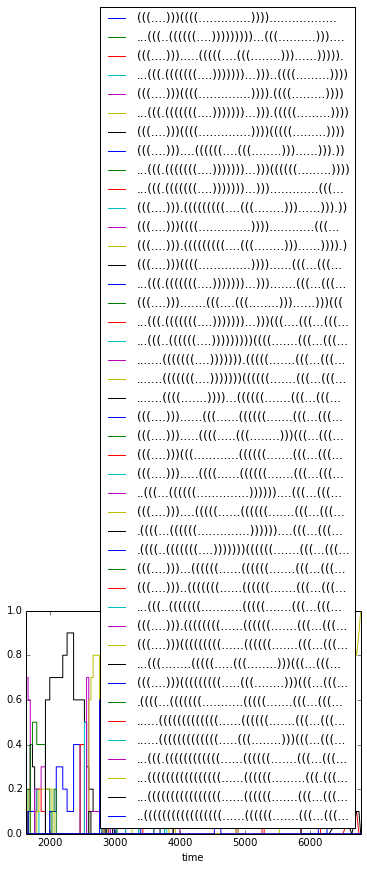

In [17]:
%matplotlib inline
timecouresstruct_int.structuredataframe.plot()

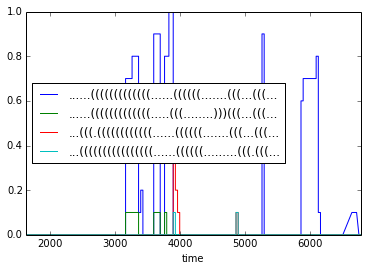

In [18]:
timecouresstruct_int.structuredataframe[[
 '......(((((((((((((......((((((.......(((...(((...',
 '......(((((((((((((.....(((........)))(((...(((...',
 '...(((.((((((((((((......((((((.......(((...(((...',
 '...((((((((((((((((......((((((.........(((.(((...']].plot()

In [48]:
timecouresstruct_float.structuredataframe[[
 '......(((((((((((((......((((((.......(((...(((...',
 '......(((((((((((((.....(((........)))(((...(((...',
 '...(((.((((((((((((......((((((.......(((...(((...',
 '...((((((((((((((((......((((((.........(((.(((...']].plot()

KeyError: "['......(((((((((((((......((((((.......(((...(((...'\n '......(((((((((((((.....(((........)))(((...(((...'\n '...(((.((((((((((((......((((((.......(((...(((...'\n '...((((((((((((((((......((((((.........(((.(((...'] not in index"

In [52]:
timecouresstruct_float.structuredataframe.columns.tolist()

['((((((..(((((....)))))..............))))))........',
 '..(((...(((((....))))).........)))((((.......)))).',
 '..((((....))))...(((................)))(((...)))..',
 '..((((....))))...(((................)))(((....))).',
 '(((((...(((((....))))).........)))))...(((....))).',
 '...(((..(((((....)))))..............)))(((....))).',
 '(((((..((((((....))).))).......)))))..((((....))))',
 '(((((...(((((....))))).........)))))..((((....))))',
 '((((((....))).....................)))(((((....))))',
 '(((((..((((((....))).))).......))))).(((((....))))',
 '(((((...(((((....))))).........))))).(((((....))))',
 '(((((..((((((....))).))).......)))))((((((....))))',
 '..(((...(((((....))))))))......(((((((.......)))))',
 '(((((...(((((....))))).........)))))((((((....))))',
 '..((((....))))......................((((((....))))',
 '((((((....)))....................)))((((((....))))',
 '........(((((....)))))..............((((((....))))',
 '........(((((....))))).........(((((((.......)))))',
 '..(((...

In [53]:
timecouresstruct_int.structuredataframe.columns.tolist()

['(((....)))((((..............))))..................',
 '...(((..((((((....)))))))))...(((..........)))....',
 '(((....))).....(((((....(((........)))......))))).',
 '...(((.(((((((....)))))))...)))..((((.........))))',
 '(((....)))((((..............)))).((((.........))))',
 '...(((.(((((((....)))))))...))).(((((.........))))',
 '(((....)))((((..............))))(((((.........))))',
 '(((....)))....((((((....(((........)))......))).))',
 '...(((.(((((((....)))))))...)))((((((.........))))',
 '...(((.(((((((....)))))))...))).............(((...',
 '(((....))).(((((((((....(((........)))......))).))',
 '(((....)))((((..............))))............(((...',
 '(((....))).(((((((((....(((........)))......)))).)',
 '(((....)))((((..............))))......(((...(((...',
 '...(((.(((((((....)))))))...))).......(((...(((...',
 '(((....))).......(((....(((........)))......)))(((',
 '...(((.(((((((....)))))))...)))(((....(((...(((...',
 '...(((..((((((....)))))))))((((.......(((...(((...',
 '.......(

In [54]:
timecouresstruct_float.completesequence

'CCUGCCGACUGGCGAGAGCCAGGUAACGAAUGCAGGGGCGGGAAACCCCGCCCCUGACAGGGCGGGGUUUUUUUUUU'

In [55]:
timecouresstruct_int.completesequence

'UACGGAAGUGGGGACGGGCCAUCAUCUAUCCCUGAAGAGACGAAGGCUUCGGCCAAGUCGAAACGGAAACGUCGGAUAGUCGCCCGUCCCGUUACUGUGGGCGAAAGCCGGCGCGUCCUGGAUUCCACUGCUUCGGCAGGUACAUCCAGCUGAUGAGUCCCAAAUAGGACGAAACGCGCUAAGCGGCAAG'

In [15]:
def structure_evaluation(dictionaryofruns, structurewindow, timewindow=None,
                         cutoff=0., firstexposure=False):
    """
    :param dictionaryofruns: This is the standard dictionary that is output by
        Kinefold runnumber:['dotbracket', etc, etc,]:list
    :type dictionaryofruns: Dictionary
    :param structurewindow: The start and stop positions of the dotbrackets to
        mine over time (1 indexed)
    :param timewindow: If used this outlines the timepoints of interest
    :type timewindow: list of lists of floats
    :param cutoff: This is a way to remove not common structures - anystructure
        which doesn't appear more than the cutoff is removed from the output
    :type cutoff: float
    """
    # Probably best to have this set up as a dictionary output?
    if timewindow:
        mintime, maxtime = timewindow
    else:
        mintime = 0
        # Grab the max time of the run
        maxtime = dictionaryofruns['dotbracket'].keys()[-1]
    timevector = calcuate_time_vector_for_structures(dictionaryofruns, [mintime, maxtime], firstexposure, structurewindow)
    # Now create structure dicitonary and populate it
    structuredataframe = pandas.DataFrame(timevector, columns=['time'])
    structuredataframe = structuredataframe.set_index('time')
    timesize = len(timevector)
    for timepoint in timevector:
        if timepoint >= mintime:
            structuredataframe = add_structure_data(dictionaryofruns['dotbracket'][timepoint], structurewindow, structuredataframe, timepoint, timesize)
        elif timepoint <= maxtime:
            structuredataframe = add_structure_data(dictionaryofruns['dotbracket'][timepoint], structurewindow, structuredataframe, timepoint, timesize)
            break
    return structuredataframe.fillna(0)

def add_structure_data(counterofstructures, structurewindow,
                       structuredataframe, timepoint, sizeoftimevector):
    tempstrudict = Counter()
    for structure in counterofstructures:
        if len(structure) < structurewindow[1]:
            return structuredataframe
        tempstru = structure[structurewindow[0]-1: structurewindow[1]]
        try:
            tempstrudict[tempstru] += counterofstructures[structure]
        except KeyError:
            tempstrudict[tempstru] = counterofstructures[structure]
    for structure in tempstrudict:
        if structure not in structuredataframe:
            structuredataframe[structure] = np.zeros(sizeoftimevector)
        structuredataframe.ix[timepoint, structure] = tempstrudict[structure]
    # print structuredataframe
    # raw_input()
    return structuredataframe

def calcuate_time_vector_for_structures(compresseddict, timewindow,
                                        firstexposure=False,
                                        windowstartstop=None):
    mintime, maxtime = timewindow
    if windowstartstop:
        lengthofsequence = windowstartstop[1]
    startindex = None
    stopindex = None
    timelist = compresseddict['dotbracket'].keys()
    for index, timepoint in enumerate(timelist):
        if firstexposure and startindex is None:
            size = len(compresseddict['dotbracket'][timepoint].most_common(1)[0][0])
            if size == lengthofsequence:
                startindex = index
        elif startindex is None and timepoint >= mintime:
            startindex = index
        elif stopindex is None and timepoint >= maxtime:
            stopindex = index
            break
    if not stopindex:
        stopindex = len(timelist) - 1
    return timelist[startindex : stopindex + 1]



In [20]:
import pandas
from collections import Counter
import numpy as np


In [21]:
%timeit structure_evaluation(compresseddict, structurewindow=[2, 50] )

1 loop, best of 3: 169 ms per loop


In [22]:
maxtime = compresseddict['dotbracket'].keys()[-1]

In [24]:
%timeit calcuate_time_vector_for_structures(compresseddict, timewindow=[0, maxtime] )

10000 loops, best of 3: 77.6 µs per loop


In [31]:
def structure_evaluation(dictionaryofruns, structurewindow, timewindow=None,
                         cutoff=0., firstexposure=False):
    """
    :param dictionaryofruns: This is the standard dictionary that is output by
        Kinefold runnumber:['dotbracket', etc, etc,]:list
    :type dictionaryofruns: Dictionary
    :param structurewindow: The start and stop positions of the dotbrackets to
        mine over time (1 indexed)
    :param timewindow: If used this outlines the timepoints of interest
    :type timewindow: list of lists of floats
    :param cutoff: This is a way to remove not common structures - anystructure
        which doesn't appear more than the cutoff is removed from the output
    :type cutoff: float
    """
    # Probably best to have this set up as a dictionary output?
    if timewindow:
        mintime, maxtime = timewindow
    else:
        mintime = 0
        # Grab the max time of the run
        maxtime = dictionaryofruns['dotbracket'].keys()[-1]
    timevector = calcuate_time_vector_for_structures(dictionaryofruns, [mintime, maxtime], firstexposure, structurewindow)
    # Now create structure dicitonary and populate it
    structuredataframe = pandas.DataFrame()
    timesize = len(timevector)
    for timepoint in timevector:
        if timepoint >= mintime:
            temp_dataframe = generate_dataframe(dictionaryofruns['dotbracket'][timepoint], 
                                                structurewindow,
                                                timepoint,
                                                timesize)
            structuredataframe = structuredataframe.append(temp_dataframe)
        elif timepoint <= maxtime:
            temp_dataframe = generate_dataframe(dictionaryofruns['dotbracket'][timepoint], 
                                                structurewindow,
                                                timepoint,
                                                timesize)
            structuredataframe = structuredataframe.append(temp_dataframe)
            break
            
    structuredataframe = structuredataframe.set_index('time')
    return structuredataframe.fillna(0)

def generate_dataframe(counterofstructures, structurewindow,
                       timepoint, timesize):
    tempstrudict = Counter()
    for structure in counterofstructures:
        if len(structure) < structurewindow[1]:
            return pandas.DataFrame()
        tempstru = structure[structurewindow[0]-1: structurewindow[1]]
        try:
            tempstrudict[tempstru] += counterofstructures[structure]
        except KeyError:
            tempstrudict[tempstru] = counterofstructures[structure]
    
    columns = ['time']
    data = [timepoint]
    for struct in tempstrudict:
        columns.append(struct)
        data.append(tempstrudict[struct])
    return pandas.DataFrame(columns=columns, data=[data])
    

def add_structure_data(counterofstructures, structurewindow,
                       structuredataframe, timepoint, sizeoftimevector):
    tempstrudict = Counter()
    for structure in counterofstructures:
        if len(structure) < structurewindow[1]:
            return structuredataframe
        tempstru = structure[structurewindow[0]-1: structurewindow[1]]
        try:
            tempstrudict[tempstru] += counterofstructures[structure]
        except KeyError:
            tempstrudict[tempstru] = counterofstructures[structure]
            
    for structure in tempstrudict:
        if structure not in structuredataframe:
            structuredataframe[structure] = np.zeros(sizeoftimevector)
        structuredataframe.ix[timepoint, structure] = tempstrudict[structure]
    # print structuredataframe
    # raw_input()
    return structuredataframe

def calcuate_time_vector_for_structures(compresseddict, timewindow,
                                        firstexposure=False,
                                        windowstartstop=None):
    mintime, maxtime = timewindow
    if windowstartstop:
        lengthofsequence = windowstartstop[1]
    startindex = None
    stopindex = None
    timelist = compresseddict['dotbracket'].keys()
    for index, timepoint in enumerate(timelist):
        if firstexposure and startindex is None:
            size = len(compresseddict['dotbracket'][timepoint].most_common(1)[0][0])
            if size == lengthofsequence:
                startindex = index
        elif startindex is None and timepoint >= mintime:
            startindex = index
        elif stopindex is None and timepoint >= maxtime:
            stopindex = index
            break
    if not stopindex:
        stopindex = len(timelist) - 1
    return timelist[startindex : stopindex + 1]



In [33]:
%timeit structure_evaluation(compresseddict, structurewindow=[2, 50] )

1 loop, best of 3: 794 ms per loop


In [34]:
structure_evaluation(compresseddict, structurewindow=[2, 50] )

,((((..(((((((....)))))))((((((.......(((...(((...,((((...(((((((...........(((((.......(((...(((...,((((...((((((..............))))))....(((...(((...,((....)))(((((((((.....(((........)))(((...(((...,((....)))(((((((((......((((((.......(((...(((...,((....)))((((..............))))(((((.........)))),((....)))((((..............)))).((((.........)))),((....)))((((..............))))......(((...(((...,((....)))((((..............))))............(((...,((....)))((((..............))))..................,...,..(((.(((((((....)))))))...))).............(((...,..(((..(((((((...........(((((.......(((...(((...,..(((..((((((....)))))))))((((.......(((...(((...,..(((..((((((....)))))))))...(((..........)))....,..(((........(((((.....(((........)))(((...(((...,.....(((((((((((((.....(((........)))(((...(((...,.....(((((((((((((......((((((.......(((...(((...,......(((((((....)))))))((((((.......(((...(((...,......(((((((....))))))).(((((.......(((...(((...,......((((.......))))...((((((.......(((...(((...
time,,,,,,,,,,,,,,,,,,,,,
1631.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
1631.8,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665.1,0.0,0.0,0.0,0.0,0.0,0.1,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1698.3,0.0,0.0,0.0,0.0,0.0,0.1,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1698.4,0.0,0.0,0.0,0.0,0.0,0.4,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1731.6,0.0,0.0,0.0,0.0,0.0,0.4,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1731.7,0.0,0.0,0.0,0.0,0.0,0.3,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1764.9,0.0,0.0,0.0,0.0,0.0,0.3,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
